<a href="https://colab.research.google.com/github/AlexKolokas/Qr-Code-Generator/blob/main/LSTM_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [281]:
from tensorflow import keras
import tensorflow.keras.backend as K
from tensorflow.keras.layers import Activation
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense, Dropout, LSTM

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [282]:
#Διαβαζω τα csv απο το github και τα κανω dataframe

url_train='https://raw.githubusercontent.com/AlexKolokas/Predictive_Maintenance/main/ALLtrainMescla5D.csv?token=AJS2BNX2YP6XWQSJYNQMXMLBMEYWQ'
train_df=pd.read_csv(url_train)
url_test='https://raw.githubusercontent.com/AlexKolokas/Predictive_Maintenance/main/ALLtestMescla5D.csv?token=AJS2BNUUI4LLO5PFECEVHMTBMEYY2'
test_df=pd.read_csv(url_test)

In [283]:
#Διαγράφω τις στήλες που δεν χρειάζομαι
train_df=train_df.drop(['datetime','error1','error2','error3','error4','error5','comp1', 'comp2','comp3','comp4','model','failed','failure','DI','RULWeek','RUL'],axis=1)
test_df=test_df.drop(['datetime','error1','error2','error3','error4','error5','comp1', 'comp2','comp3','comp4','model','failed','failure','DI','RULWeek','RUL'],axis=1)

In [284]:
train_df

,machineID,time_in_cycles,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h,voltmean_5d,rotatemean_5d,pressuremean_5d,vibrationmean_5d,voltsd_5d,rotatesd_5d,pressuresd_5d,vibrationsd_5d,age,RUL_I
0,1,2,171.025033,454.614348,102.377665,41.506930,17.623759,43.648283,8.540959,4.298246,171.698774,452.843541,100.529177,44.874649,1.879874,5.011519,2.141369,5.217156,18,59.0
1,1,3,174.139410,444.337772,96.674842,41.702771,10.611608,39.450931,10.669844,5.808709,172.567505,452.344562,100.173224,45.360874,1.781676,5.818804,2.658025,4.646503,18,58.0
2,1,4,172.135931,446.126781,102.097039,39.281983,13.829868,38.445908,9.558219,4.133639,172.622242,449.728970,100.992985,43.602453,1.758648,4.817313,2.442889,5.012262,18,57.0
3,1,5,169.350052,466.884090,100.128260,38.571482,14.600352,40.676186,8.463613,4.632150,171.533767,453.357148,100.728184,40.878696,1.763873,8.948939,2.452399,1.933709,18,56.0
4,1,6,171.006246,455.695551,99.680231,39.789390,12.461183,33.019600,9.178725,5.427788,171.531334,453.531708,100.191607,40.170511,1.764769,8.993078,2.293615,1.380712,18,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20862,100,335,166.637041,443.320475,98.053732,39.556574,10.994774,56.659652,7.114386,3.965204,168.692749,445.857269,99.418698,39.388676,1.312232,5.825312,0.804494,0.344234,5,4.0
20863,100,336,170.826845,463.537218,100.731194,40.040140,13.063571,53.773110,10.257679,4.627104,169.065193,450.521585,99.531104,39.615888,1.633607,8.770838,0.959832,0.318368,5,3.0
20864,100,337,169.602066,376.676980,98.959072,42.700168,12.970158,69.725998,12.696419,4.450957,169.213831,435.313050,99.418800,40.285144,1.643920,33.909464,0.993624,1.379316,5,2.0
20865,100,338,171.742111,361.745122,100.189140,41.407176,15.262020,50.659892,11.826398,4.098816,169.820165,417.363874,99.501261,40.599293,1.943610,45.108360,1.046469,1.429530,5,1.0


In [285]:
test_df

,machineID,time_in_cycles,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h,voltmean_5d,rotatemean_5d,pressuremean_5d,vibrationmean_5d,voltsd_5d,rotatesd_5d,pressuresd_5d,vibrationsd_5d,age,RUL_I
0,1,167,171.642562,449.721998,102.227310,41.187200,13.475406,36.652940,10.390542,5.787272,172.325721,461.247550,100.839082,43.833989,1.856307,8.306869,1.269115,3.642504,18,74.0
1,1,168,166.013817,437.824317,101.381017,39.624711,15.906431,47.273253,9.796988,4.713076,170.826654,454.924142,101.357783,43.656491,3.201059,11.806759,0.543627,3.859973,18,73.0
2,1,169,165.015422,455.029295,98.692730,42.448048,14.879153,39.883298,8.413634,5.272388,169.268622,452.123128,100.874311,42.838998,3.830929,8.934238,1.328020,3.515241,18,72.0
3,1,170,167.467814,430.977797,101.778128,39.295629,15.251001,55.779936,9.419346,4.146292,168.868460,446.845777,100.967013,40.935344,3.908527,12.244211,1.381539,1.428656,18,71.0
4,1,171,168.919494,440.108532,98.117481,38.211770,13.502971,58.614352,8.667383,3.766547,167.811822,442.732388,100.439333,40.153471,2.601563,9.607455,1.891932,1.667285,18,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7184,100,245,172.077586,434.486534,100.517796,37.933671,14.074405,42.003642,9.271168,4.269170,170.721532,447.152728,100.135904,39.508133,2.261927,14.811443,1.428639,1.098711,5,4.0
7185,100,246,174.040839,455.283708,100.677378,40.719428,15.311915,48.363836,8.226679,4.749044,171.058604,451.709940,100.639487,39.462551,2.657310,12.500160,0.905945,1.026427,5,3.0
7186,100,247,183.568853,461.623658,99.718751,41.277142,19.684567,61.831826,7.926788,5.280737,173.383485,453.446374,100.406082,39.777402,6.263813,13.291962,0.974378,1.318478,5,2.0
7187,100,248,194.749947,457.265965,99.580578,40.427360,11.448941,36.929313,7.622441,4.915153,178.276192,451.138721,100.463248,40.036295,11.002071,10.709857,0.898290,1.286998,5,1.0


In [286]:
#δημιουργω την στηλη label 1 με τιμές αν το rul ειναι μικροτερο ή ισο του 30 τοτε 1 αλλιως 0 και η στηλη label 2 αν η στηλη rul μικρότερη ίση του 15 βαζει 2 αλλιως 0

#w1 = 30
#w0 = 15
#train_df['label1'] = np.where(train_df['RUL_I'] <= w1, 1, 0 )
#train_df['label2'] = train_df['label1']
#train_df.loc[train_df['RUL_I'] <= w0, 'label2'] = 2

In [287]:
#test_df['label1'] = np.where(test_df['RUL_I'] <= w1, 1, 0 )
#test_df['label2'] = test_df['label1']
#test_df.loc[test_df['RUL_I'] <= w0, 'label2'] = 2

In [288]:

scaler = MinMaxScaler(feature_range=(0, 1))
train_df[['voltmean_24h','rotatemean_24h','pressuremean_24h','vibrationmean_24h','voltsd_24h','rotatesd_24h','pressuresd_24h','vibrationsd_24h','voltmean_5d','rotatemean_5d','pressuremean_5d','vibrationmean_5d','voltsd_5d','rotatesd_5d','pressuresd_5d','vibrationsd_5d','age']] = scaler.fit_transform(train_df[['voltmean_24h','rotatemean_24h','pressuremean_24h','vibrationmean_24h','voltsd_24h','rotatesd_24h','pressuresd_24h','vibrationsd_24h','voltmean_5d','rotatemean_5d','pressuremean_5d','vibrationmean_5d','voltsd_5d','rotatesd_5d','pressuresd_5d','vibrationsd_5d','age']])

train_df=pd.DataFrame(train_df)
train_df

,machineID,time_in_cycles,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h,voltmean_5d,rotatemean_5d,pressuremean_5d,vibrationmean_5d,voltsd_5d,rotatesd_5d,pressuresd_5d,vibrationsd_5d,age,RUL_I
0,1,2,0.219423,0.825480,0.180132,0.214162,0.520969,0.241892,0.242233,0.255090,0.255663,0.856165,0.148213,0.476192,0.076835,0.047754,0.075492,0.502432,0.90,59.0
1,1,3,0.270883,0.779217,0.086502,0.222012,0.151896,0.186829,0.370286,0.461725,0.285516,0.851183,0.135862,0.511230,0.072485,0.056785,0.095049,0.446686,0.90,58.0
2,1,4,0.237779,0.787271,0.175524,0.124984,0.321284,0.173644,0.303422,0.232572,0.287397,0.825071,0.164305,0.384516,0.071465,0.045581,0.086905,0.482416,0.90,57.0
3,1,5,0.191746,0.880716,0.143201,0.096506,0.361837,0.202902,0.237580,0.300769,0.249993,0.861292,0.155118,0.188239,0.071697,0.091803,0.087265,0.181679,0.90,56.0
4,1,6,0.219112,0.830347,0.135845,0.145321,0.249245,0.102459,0.280595,0.409614,0.249909,0.863035,0.136500,0.137206,0.071736,0.092297,0.081255,0.127658,0.90,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20862,100,335,0.146917,0.774637,0.109141,0.135990,0.172063,0.412581,0.156424,0.209530,0.152365,0.786419,0.109682,0.080866,0.051692,0.056858,0.024888,0.026406,0.25,4.0
20863,100,336,0.216148,0.865649,0.153100,0.155371,0.280951,0.374714,0.345494,0.300079,0.165163,0.832984,0.113582,0.097239,0.065927,0.089811,0.030767,0.023880,0.25,3.0
20864,100,337,0.195910,0.474624,0.124005,0.261988,0.276034,0.583992,0.492186,0.275982,0.170271,0.681154,0.109685,0.145466,0.066384,0.371044,0.032047,0.127521,0.25,2.0
20865,100,338,0.231271,0.407404,0.144200,0.210164,0.396663,0.333873,0.439854,0.227808,0.191107,0.501964,0.112547,0.168104,0.079658,0.496329,0.034047,0.132427,0.25,1.0


In [289]:
clist = ['machineID','time_in_cycles','voltmean_24h','rotatemean_24h','pressuremean_24h','vibrationmean_24h','voltsd_24h','rotatesd_24h','pressuresd_24h','vibrationsd_24h','voltmean_5d','rotatemean_5d','pressuremean_5d','vibrationmean_5d','voltsd_5d','rotatesd_5d','pressuresd_5d','vibrationsd_5d','age','RUL_I']#,'label1','label2']
train_df= train_df[clist]
train_df

,machineID,time_in_cycles,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h,voltmean_5d,rotatemean_5d,pressuremean_5d,vibrationmean_5d,voltsd_5d,rotatesd_5d,pressuresd_5d,vibrationsd_5d,age,RUL_I
0,1,2,0.219423,0.825480,0.180132,0.214162,0.520969,0.241892,0.242233,0.255090,0.255663,0.856165,0.148213,0.476192,0.076835,0.047754,0.075492,0.502432,0.90,59.0
1,1,3,0.270883,0.779217,0.086502,0.222012,0.151896,0.186829,0.370286,0.461725,0.285516,0.851183,0.135862,0.511230,0.072485,0.056785,0.095049,0.446686,0.90,58.0
2,1,4,0.237779,0.787271,0.175524,0.124984,0.321284,0.173644,0.303422,0.232572,0.287397,0.825071,0.164305,0.384516,0.071465,0.045581,0.086905,0.482416,0.90,57.0
3,1,5,0.191746,0.880716,0.143201,0.096506,0.361837,0.202902,0.237580,0.300769,0.249993,0.861292,0.155118,0.188239,0.071697,0.091803,0.087265,0.181679,0.90,56.0
4,1,6,0.219112,0.830347,0.135845,0.145321,0.249245,0.102459,0.280595,0.409614,0.249909,0.863035,0.136500,0.137206,0.071736,0.092297,0.081255,0.127658,0.90,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20862,100,335,0.146917,0.774637,0.109141,0.135990,0.172063,0.412581,0.156424,0.209530,0.152365,0.786419,0.109682,0.080866,0.051692,0.056858,0.024888,0.026406,0.25,4.0
20863,100,336,0.216148,0.865649,0.153100,0.155371,0.280951,0.374714,0.345494,0.300079,0.165163,0.832984,0.113582,0.097239,0.065927,0.089811,0.030767,0.023880,0.25,3.0
20864,100,337,0.195910,0.474624,0.124005,0.261988,0.276034,0.583992,0.492186,0.275982,0.170271,0.681154,0.109685,0.145466,0.066384,0.371044,0.032047,0.127521,0.25,2.0
20865,100,338,0.231271,0.407404,0.144200,0.210164,0.396663,0.333873,0.439854,0.227808,0.191107,0.501964,0.112547,0.168104,0.079658,0.496329,0.034047,0.132427,0.25,1.0


In [290]:
test_df[['voltmean_24h','rotatemean_24h','pressuremean_24h','vibrationmean_24h','voltsd_24h','rotatesd_24h','pressuresd_24h','vibrationsd_24h','voltmean_5d','rotatemean_5d','pressuremean_5d','vibrationmean_5d','voltsd_5d','rotatesd_5d','pressuresd_5d','vibrationsd_5d','age']] = scaler.fit_transform(test_df[['voltmean_24h','rotatemean_24h','pressuremean_24h','vibrationmean_24h','voltsd_24h','rotatesd_24h','pressuresd_24h','vibrationsd_24h','voltmean_5d','rotatemean_5d','pressuremean_5d','vibrationmean_5d','voltsd_5d','rotatesd_5d','pressuresd_5d','vibrationsd_5d','age']])
test_df=pd.DataFrame(test_df)
test_df

,machineID,time_in_cycles,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h,voltmean_5d,rotatemean_5d,pressuremean_5d,vibrationmean_5d,voltsd_5d,rotatesd_5d,pressuresd_5d,vibrationsd_5d,age,RUL_I
0,1,167,0.251901,0.784132,0.209710,0.199967,0.339729,0.185886,0.373420,0.434661,0.290230,0.940061,0.179337,0.529009,0.079479,0.093143,0.050220,0.361646,0.90,74.0
1,1,168,0.143355,0.718279,0.193939,0.137132,0.480593,0.357797,0.333317,0.292539,0.224890,0.884495,0.199629,0.511452,0.145291,0.137468,0.016197,0.383757,0.90,73.0
2,1,169,0.124102,0.813508,0.143842,0.250672,0.421068,0.238176,0.239851,0.366539,0.156979,0.859881,0.180715,0.430591,0.176116,0.101088,0.052982,0.348707,0.90,72.0
3,1,170,0.171394,0.680384,0.201339,0.123898,0.442614,0.495495,0.307802,0.217551,0.139538,0.813506,0.184342,0.242296,0.179914,0.143008,0.055492,0.136561,0.90,71.0
4,1,171,0.199389,0.730922,0.133122,0.080311,0.341326,0.541376,0.256996,0.167309,0.093482,0.777360,0.163699,0.164959,0.115952,0.109614,0.079428,0.160823,0.90,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7184,100,245,0.260290,0.699805,0.177853,0.069128,0.374437,0.272498,0.297790,0.233808,0.220308,0.816204,0.151829,0.101127,0.099330,0.175521,0.057701,0.103015,0.25,4.0
7185,100,246,0.298150,0.814916,0.180826,0.181156,0.446144,0.375451,0.227220,0.297298,0.235000,0.856250,0.171529,0.096619,0.118680,0.146249,0.033188,0.095666,0.25,3.0
7186,100,247,0.481890,0.850007,0.162962,0.203585,0.699513,0.593457,0.206958,0.367644,0.336335,0.871509,0.162398,0.127761,0.295180,0.156277,0.036398,0.125359,0.25,2.0
7187,100,248,0.697508,0.825887,0.160387,0.169411,0.222307,0.190360,0.186395,0.319275,0.549594,0.851230,0.164634,0.153369,0.527068,0.123576,0.032829,0.122158,0.25,1.0


In [291]:
clist = ['machineID','time_in_cycles','voltmean_24h','rotatemean_24h','pressuremean_24h','vibrationmean_24h','voltsd_24h','rotatesd_24h','pressuresd_24h','vibrationsd_24h','voltmean_5d','rotatemean_5d','pressuremean_5d','vibrationmean_5d','voltsd_5d','rotatesd_5d','pressuresd_5d','vibrationsd_5d','age','RUL_I']#,'label1','label2']
test_df= test_df[clist]
test_df

,machineID,time_in_cycles,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h,voltmean_5d,rotatemean_5d,pressuremean_5d,vibrationmean_5d,voltsd_5d,rotatesd_5d,pressuresd_5d,vibrationsd_5d,age,RUL_I
0,1,167,0.251901,0.784132,0.209710,0.199967,0.339729,0.185886,0.373420,0.434661,0.290230,0.940061,0.179337,0.529009,0.079479,0.093143,0.050220,0.361646,0.90,74.0
1,1,168,0.143355,0.718279,0.193939,0.137132,0.480593,0.357797,0.333317,0.292539,0.224890,0.884495,0.199629,0.511452,0.145291,0.137468,0.016197,0.383757,0.90,73.0
2,1,169,0.124102,0.813508,0.143842,0.250672,0.421068,0.238176,0.239851,0.366539,0.156979,0.859881,0.180715,0.430591,0.176116,0.101088,0.052982,0.348707,0.90,72.0
3,1,170,0.171394,0.680384,0.201339,0.123898,0.442614,0.495495,0.307802,0.217551,0.139538,0.813506,0.184342,0.242296,0.179914,0.143008,0.055492,0.136561,0.90,71.0
4,1,171,0.199389,0.730922,0.133122,0.080311,0.341326,0.541376,0.256996,0.167309,0.093482,0.777360,0.163699,0.164959,0.115952,0.109614,0.079428,0.160823,0.90,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7184,100,245,0.260290,0.699805,0.177853,0.069128,0.374437,0.272498,0.297790,0.233808,0.220308,0.816204,0.151829,0.101127,0.099330,0.175521,0.057701,0.103015,0.25,4.0
7185,100,246,0.298150,0.814916,0.180826,0.181156,0.446144,0.375451,0.227220,0.297298,0.235000,0.856250,0.171529,0.096619,0.118680,0.146249,0.033188,0.095666,0.25,3.0
7186,100,247,0.481890,0.850007,0.162962,0.203585,0.699513,0.593457,0.206958,0.367644,0.336335,0.871509,0.162398,0.127761,0.295180,0.156277,0.036398,0.125359,0.25,2.0
7187,100,248,0.697508,0.825887,0.160387,0.169411,0.222307,0.190360,0.186395,0.319275,0.549594,0.851230,0.164634,0.153369,0.527068,0.123576,0.032829,0.122158,0.25,1.0


In [292]:
sequence_length =29

In [293]:
# function to reshape features into (samples, time steps, features) 
def gen_sequence(id_df, seq_length, seq_cols):
    """ Only sequences that meet the window-length are considered, no padding is used. This means for testing
    we need to drop those which are below the window-length. An alternative would be to pad sequences so that
    we can use shorter ones """
    # for one id I put all the rows in a single matrix
    data_matrix = id_df[seq_cols].values
    num_elements = data_matrix.shape[0]
    # Iterate over two lists in parallel.
    # For example id1 have 192 rows and sequence_length is equal to 50
    # so zip iterate over two following list of numbers (0,112),(50,192)
    # 0 50 -> from row 0 to row 50
    # 1 51 -> from row 1 to row 51
    # 2 52 -> from row 2 to row 52
    # ...
    # 111 191 -> from row 111 to 191

    for start, stop in zip(range(0, num_elements-seq_length), range(seq_length, num_elements)):
        yield data_matrix[start:stop, :]
       
        

In [294]:
sequence_cols = list(train_df.columns[2:20]) #we take the features that we want to use for the prediction
sequence_cols

['voltmean_24h',
 'rotatemean_24h',
 'pressuremean_24h',
 'vibrationmean_24h',
 'voltsd_24h',
 'rotatesd_24h',
 'pressuresd_24h',
 'vibrationsd_24h',
 'voltmean_5d',
 'rotatemean_5d',
 'pressuremean_5d',
 'vibrationmean_5d',
 'voltsd_5d',
 'rotatesd_5d',
 'pressuresd_5d',
 'vibrationsd_5d',
 'age',
 'RUL_I']

In [295]:
seq_gen = (list(gen_sequence(train_df[train_df['machineID']==id], sequence_length, sequence_cols)) 
           for id in train_df['machineID'].unique())

In [296]:
seq_array = np.concatenate(list(seq_gen)).astype(np.float32)
print(seq_array.shape)

(18025, 29, 18)


In [297]:
# function to generate labels
def gen_labels(id_df, seq_length, label):
    """ Only sequences that meet the window-length are considered, no padding is used. This means for testing
    we need to drop those which are below the window-length. An alternative would be to pad sequences so that
    we can use shorter ones """
    # For one id I put all the labels in a single matrix.
    # For example:
    # [[1]
    # [4]
    # [1]
    # [5]
    # [9]
    # ...
    # [200]] 
    data_matrix = id_df[label].values
    num_elements = data_matrix.shape[0]
    # I have to remove the first seq_length labels
    # because for one id the first sequence of seq_length size have as target
    # the last label (the previus ones are discarded).
    # All the next id's sequences will have associated step by step one label as target.
    return data_matrix[seq_length:num_elements, :]

    

In [298]:
# generate labels
label_gen = [gen_labels(train_df[train_df['machineID']==id], sequence_length, ['RUL_I']) 
             for id in train_df['machineID'].unique()]

label_array = np.concatenate(label_gen).astype(np.float32)
label_array.shape

(18025, 1)

In [299]:
##################################
# Modeling
##################################

def r2_keras(y_true, y_pred):
    """Coefficient of Determination 
    """
    SS_res =  K.sum(K.square( y_true - y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [300]:
nb_features = seq_array.shape[2]
nb_out = label_array.shape[1]

In [301]:
model = Sequential()
model.add(LSTM(
         input_shape=(sequence_length, nb_features),
         units=100,
         return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(
          units=50,
          return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=nb_out))
model.add(Activation("linear"))
model.compile(loss='mean_squared_error', optimizer='rmsprop',metrics=['mae',r2_keras])

In [302]:
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 29, 100)           47600     
_________________________________________________________________
dropout_12 (Dropout)         (None, 29, 100)           0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 50)                30200     
_________________________________________________________________
dropout_13 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 51        
_________________________________________________________________
activation_6 (Activation)    (None, 1)                 0         
Total params: 77,851
Trainable params: 77,851
Non-trainable params: 0
__________________________________________________

In [303]:
# fit the network
history = model.fit(seq_array, label_array, epochs=100, batch_size=200, validation_split=0.05, verbose=2,
          callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='min')]
          )



Epoch 1/100
86/86 - 6s - loss: 2395.0222 - mae: 30.7836 - r2_keras: -5.2810e-01 - val_loss: 562.0477 - val_mae: 17.4322 - val_r2_keras: -4.9409e-01
Epoch 2/100
86/86 - 2s - loss: 2106.3257 - mae: 27.7177 - r2_keras: -3.3958e-01 - val_loss: 436.9627 - val_mae: 13.6111 - val_r2_keras: -1.4226e-01
Epoch 3/100
86/86 - 2s - loss: 1886.5847 - mae: 23.7078 - r2_keras: -1.9484e-01 - val_loss: 335.3881 - val_mae: 10.5351 - val_r2_keras: 0.1388
Epoch 4/100
86/86 - 2s - loss: 1704.8003 - mae: 21.2528 - r2_keras: -7.7930e-02 - val_loss: 255.4644 - val_mae: 8.9155 - val_r2_keras: 0.3551
Epoch 5/100
86/86 - 2s - loss: 1540.7533 - mae: 19.1772 - r2_keras: 0.0289 - val_loss: 193.8139 - val_mae: 7.3128 - val_r2_keras: 0.5180
Epoch 6/100
86/86 - 2s - loss: 1403.8153 - mae: 17.4991 - r2_keras: 0.1173 - val_loss: 149.2656 - val_mae: 6.2896 - val_r2_keras: 0.6323
Epoch 7/100
86/86 - 2s - loss: 1273.8236 - mae: 15.9808 - r2_keras: 0.1997 - val_loss: 110.3218 - val_mae: 5.5426 - val_r2_keras: 0.7304
Epoch 8/

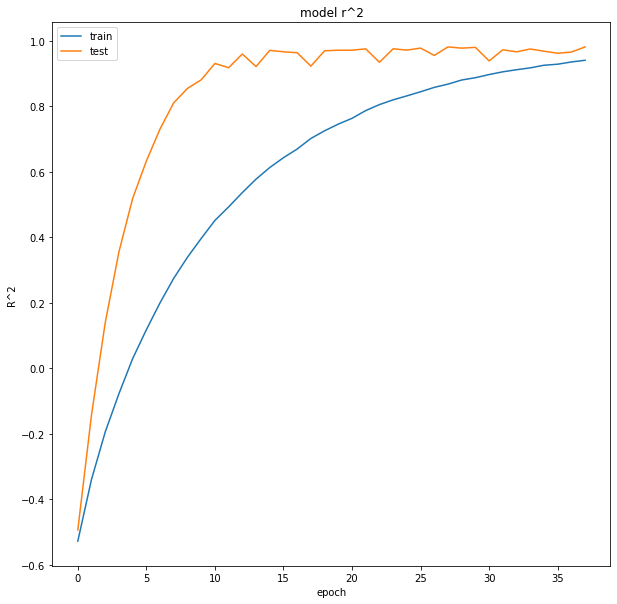

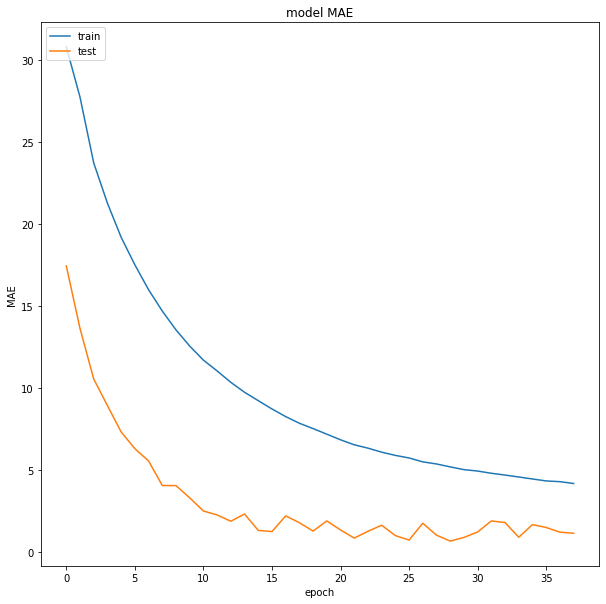

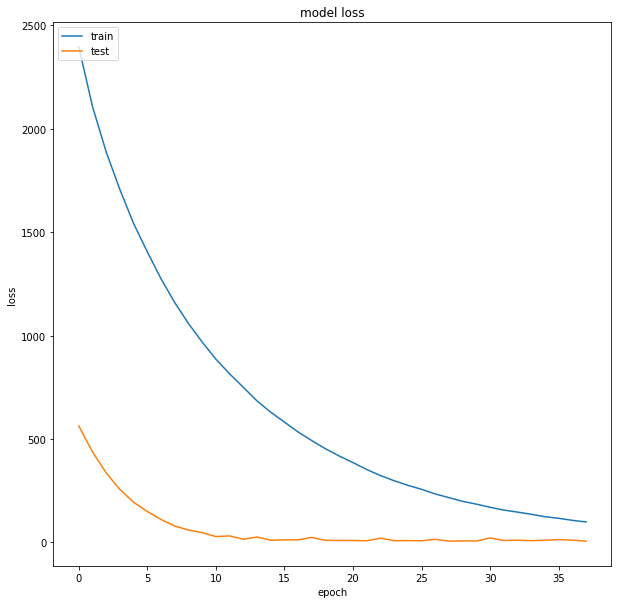

91/91 [==============================] - 1s 8ms/step - loss: 72.2570 - mae: 2.2092 - r2_keras: 0.9730

MAE: 2.2092041969299316

R^2: 0.9729616045951843
91/91 [==============================] - 1s 6ms/step


In [304]:
# summarize history for R^2
fig_acc = plt.figure(figsize=(10, 10))
plt.plot(history.history['r2_keras'])
plt.plot(history.history['val_r2_keras'])
plt.title('model r^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for MAE
fig_acc = plt.figure(figsize=(10, 10))
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model MAE')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# summarize history for Loss
fig_acc = plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# training metrics
scores = model.evaluate(seq_array, label_array, verbose=1, batch_size=200)
print('\nMAE: {}'.format(scores[1]))
print('\nR^2: {}'.format(scores[2]))

y_pred = model.predict(seq_array,verbose=1, batch_size=200)
y_true = label_array

test_set = pd.DataFrame(y_pred)



In [305]:
seq_array_test_last = [test_df[test_df['machineID']==id][sequence_cols].values[-sequence_length:] 
                       for id in test_df['machineID'].unique() if len(test_df[test_df['machineID']==id]) >= sequence_length]
seq_array_test_last = np.asarray(seq_array_test_last).astype(np.float32)
seq_array_test_last = np.asarray(seq_array_test_last).astype(np.float32)


In [306]:
# Similarly, we pick the labels
#print("y_mask")
y_mask = [len(test_df[test_df['machineID']==id]) >= sequence_length for id in test_df['machineID'].unique()]
label_array_test_last = test_df.groupby('machineID')['RUL_I'].nth(0)[y_mask].values
label_array_test_last = label_array_test_last.reshape(label_array_test_last.shape[0],1).astype(np.float32)


In [307]:
scores_test = model.evaluate(seq_array_test_last, label_array_test_last, verbose=2)
print('\nMAE: {}'.format(scores_test[1]))
print('\nR^2: {}'.format(scores_test[2]))

y_pred_test = model.predict(seq_array_test_last)
y_true_test = label_array_test_last


3/3 - 0s - loss: 1996.4633 - mae: 29.7351 - r2_keras: -5.8619e-02

MAE: 29.73514175415039

R^2: -0.05861930176615715


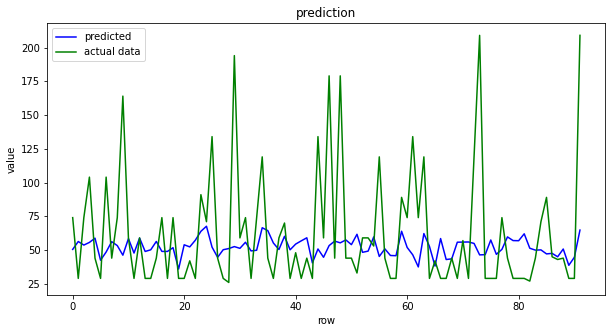

In [308]:

fig_verify = plt.figure(figsize=(10, 5))
plt.plot(y_pred_test, color="blue")
plt.plot(y_true_test, color="green")
plt.title('prediction')
plt.ylabel('value')
plt.xlabel('row')
plt.legend(['predicted', 'actual data'], loc='upper left')
plt.show()